In [3]:
import pandas_datareader as pdr 
import datetime as dt 
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import pandas as pd

In [18]:
df = pdr.DataReader('^IXIC', data_source='yahoo', start = dt.date(2000, 1, 2), end = dt.date(2022, 1, 1))

# df.tail(20)
# df2 = pdr.DataReader('AAPL', data_source = 'yahoo', start = '2021-01-01', end = '2022-01-01')

<AxesSubplot:xlabel='Date'>

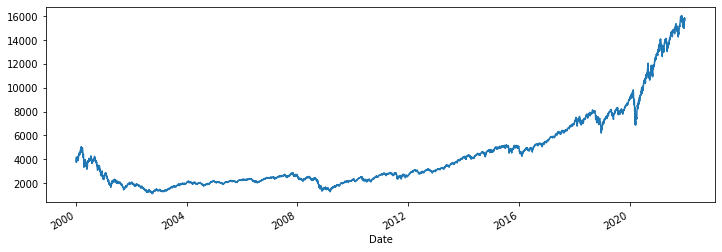

In [19]:
df['Close'].plot(figsize = (12, 4))

In [22]:
# group data to weekly
df_weekly = df['Close'].resample('W').last().pct_change().dropna()
df_weekly.head()

Date
2000-01-16    0.046785
2000-01-23    0.042106
2000-01-30   -0.082242
2000-02-06    0.091861
2000-02-13    0.035652
Freq: W-SUN, Name: Close, dtype: float64

<AxesSubplot:xlabel='Date'>

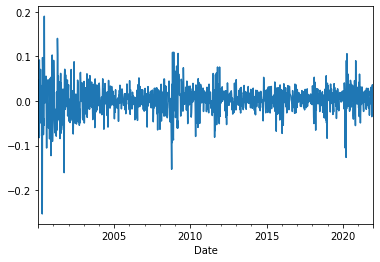

In [23]:
df_weekly.plot()

In [25]:
# check for stationarity
pd.Series(adfuller(df_weekly, regresults = False), index = ['adf', 'p-value', 'used_lag', 'n_obs', 'critical_values', 'max_ic'])

adf                                                       -35.290334
p-value                                                          0.0
used_lag                                                           0
n_obs                                                           1146
critical_values    {'1%': -3.4360690296267338, '5%': -2.864065327...
max_ic                                                  -4654.731635
dtype: object

In [26]:
# let's model three variance regimes 

# Fit the model
mod_kns = sm.tsa.MarkovRegression(df_weekly, k_regimes=3, trend='n', switching_variance=True)
res_kns = mod_kns.fit()
res_kns.summary()

/Users/sinpasin/Codes/bitbucket_source/coding_for_investments/env/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                        Markov Switching Model Results                        
==============================================================================
Dep. Variable:                  Close   No. Observations:                 1147
Model:               MarkovRegression   Log Likelihood                2520.301
Date:                Thu, 24 Feb 2022   AIC                          -5022.603
Time:                        13:52:41   BIC                          -4977.199
Sample:                    01-16-2000   HQIC                         -5005.461
                         - 01-02-2022                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0010   9.04e-05     11.143      0.000       0.001       0.001
                             Regime 1 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0003   2.41e-05     13.210      0.000       0.000       0.000
                             Regime 2 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0044      0.001      7.831      0.000       0.003       0.005
                         Regime transition parameters                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p[0->0]        0.9702      0.011     85.986      0.000       0.948       0.992
p[1->0]        0.0160      0.008      2.109      0.035       0.001       0.031
p[2->0]        0.0193      0.012      1.585      0.113      -0.005       0.043
p[0->1]        0.0253      0.011      2.382      0.017       0.004       0.046
p[1->1]        0.9815      0.007    132.784      0.000       0.967       0.996
p[2->1]     3.834e-05        nan        nan        nan         nan         nan
==============================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

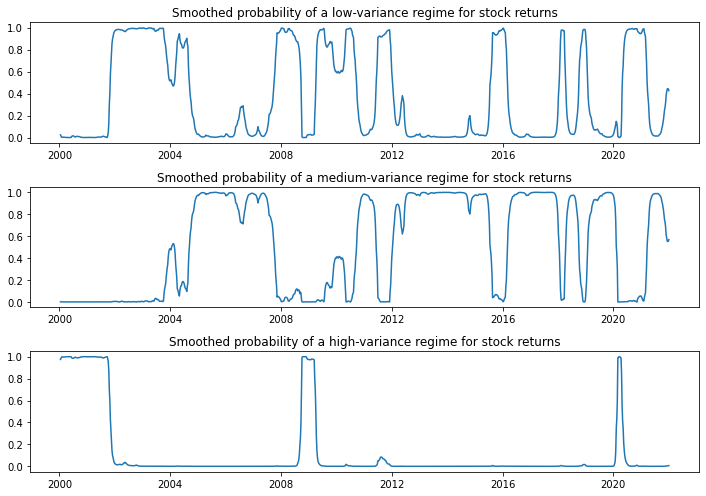

In [27]:
# Plot smooth probabilities of each regime
fig, axes = plt.subplots(3, figsize=(10,7))

ax = axes[0]
ax.plot(res_kns.smoothed_marginal_probabilities[0])
ax.set(title='Smoothed probability of a low-variance regime for stock returns')

ax = axes[1]
ax.plot(res_kns.smoothed_marginal_probabilities[1])
ax.set(title='Smoothed probability of a medium-variance regime for stock returns')

ax = axes[2]
ax.plot(res_kns.smoothed_marginal_probabilities[2])
ax.set(title='Smoothed probability of a high-variance regime for stock returns')

fig.tight_layout()

In [36]:
# # create a result table
# res_kns.smoothed_marginal_probabilities.plot(figsize = (12, 4))
# plt.legend(loc = 'best')
# plt.show()